In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
df = pd.read_csv('FineTech_appData.csv')

In [3]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
df.tail()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [5]:
df.shape

(50000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [7]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.screen_list.unique()

array(['idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login',
       'joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2',
       'Splash,Cycle,Loan', ...,
       'joinscreen,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifyDateOfBirth,location,Home',
       'Cycle,Home,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,VerifySSN,product_review,SelectInstitution,BankVerification,product_review,product_review',
       'product_review,ScanPreview,VerifyDateOfBirth,VerifyCountry,ProfileVerifySSN,ProfilePage,ProfileEducation,ProfileEducationMajor,Saving2Amount,Saving8,ProfileMaritalStatus,ProfileChildren,Saving2,Saving9,Saving7,Saving6,Saving5,Home,Loan2'],
      dtype=obj

In [9]:
for i in [1,2,3,4,5]:
    print(df.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [10]:
#counting missing values

In [11]:
df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [12]:
df['hour'] = df.hour.str.slice(1,3).astype(int)

In [13]:
df['hour']

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [14]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [15]:
#visualisation

In [16]:
df2 = df.drop(['user','first_open','screen_list','enrolled_date'], axis = 1)

In [17]:
df2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


In [18]:
df2.columns

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')

Text(0.5, 1.0, 'Heatmap using correlation matrix of df2')

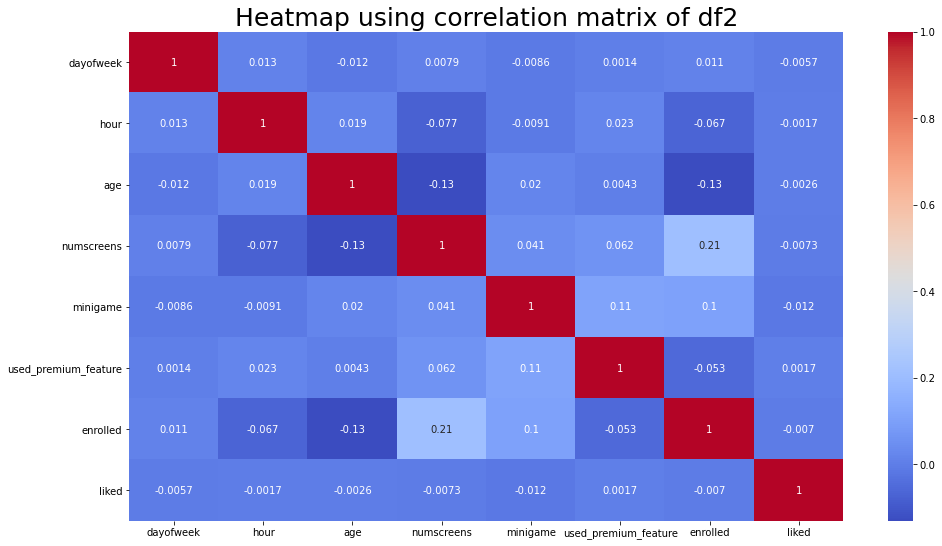

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(), annot = True, cmap = 'coolwarm')
plt.title("Heatmap using correlation matrix of df2", fontsize = 25)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled', ylabel='count'>

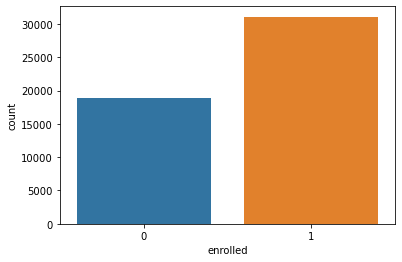

In [20]:
sns.countplot(df.enrolled)

In [21]:
print("Not enrolled= ", (df.enrolled < 1).sum(), "out of 50000")
print("Enrolled= ", 50000 - (df.enrolled < 1).sum(), "out of 50000")

Not enrolled=  18926 out of 50000
Enrolled=  31074 out of 50000


In [22]:
#Histogram of each feature of df2

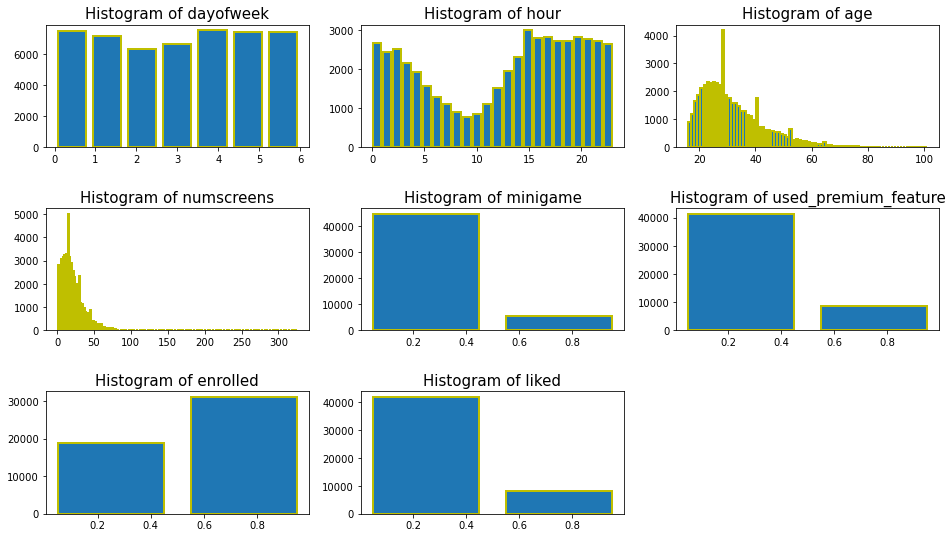

In [23]:
plt.figure(figsize = (16,9))
features = df2.columns
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1)
    plt.title("Histogram of {}".format(j), fontsize = 15)
     
    bins = len(df2[j].unique())
    plt.hist(df2[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, )
     
plt.subplots_adjust(hspace=0.5) 

In [1]:
#In the above histogram, we can see minigame, used_primium_feature, enrolled, and like they have only two values and how they distributed.

#The histogram of ‘dayofweek’ shows, on Tuesday and Wednesday slightly fewer customer registered the app.

#The histogram of ‘hour’ shows the less customer register on the app around 10 AM.

#The ‘age’ histogram shows, the maximum customers are younger.

#The ‘numsreens’ histogram shows the few customers saw more than 40 screens.

In [25]:
#Correlation barplot with ‘enrolled’ feature

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


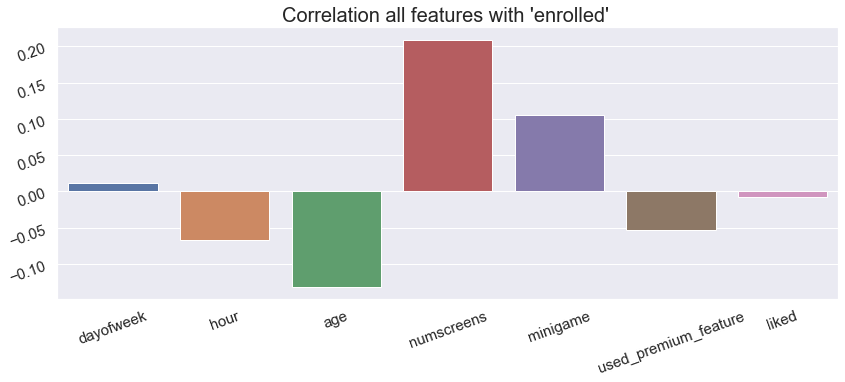

In [26]:
sns.set()
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
df3 = df2.drop(['enrolled'], axis = 1)
ax = sns.barplot(df3.columns, df3.corrwith(df2.enrolled))
ax.tick_params(labelsize=15, labelrotation = 20, color ="k")

In [27]:
#as you can see ,the ‘numscreens’ and ‘minigame’ is strongly positively correlated with ‘enrolled’ feature than other feature.

In [28]:
#Now, we are parsing ‘first_open’ and ‘enrolled_date’ object data in data and time format.

In [29]:
df['first_open'] =[parser.parse(i) for i in df['first_open']]
df['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in df['enrolled_date']]

In [30]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [31]:
df['time_for_enrolled'] = (df.enrolled_date - df.first_open).astype('timedelta64[h]')

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

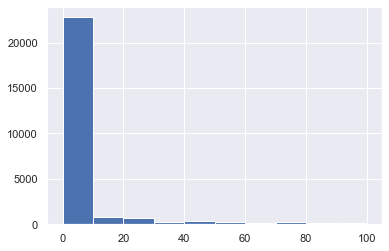

In [32]:
plt.hist(df['time_for_enrolled'].dropna(), range = (0,100))

In [33]:
 #the maximum customers have enrolled the app in 10 hours from the registration.

In [34]:
df.loc[df.time_for_enrolled > 48, 'enrolled'] = 0

In [35]:
#we are considering those customers have enrolled after 48 hours as 0.

In [36]:
df.drop(columns = ['time_for_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [37]:
df_st = pd.read_csv('top_screens.csv').top_screens.values

In [38]:
df_st

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [39]:
df['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                        Splash,Cycle,Loan
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                   Cycle,Splash,Home,RewardsContainer
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [40]:
type(df_st)

numpy.ndarray

In [41]:
df['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                        Splash,Cycle,Loan
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                   Cycle,Splash,Home,RewardsContainer
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [42]:
df['screen_list'] = df.screen_list.astype(str) + ','

In [43]:
df['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                  Cycle,Splash,Home,RewardsContainer,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [44]:
for screen_name in df_st:
    df[screen_name] = df.screen_list.str.contains(screen_name).astype(int)
    df['screen_list'] = df.screen_list.str.replace(screen_name+",", "")

In [45]:
df.shape

(50000, 68)

In [46]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#Those screens are not availble in ‘df’ that are counted
#and conted number store in new column by name ‘remain_screen_list’.

In [48]:
df.loc[0, 'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [49]:
df['remain_screen_list'] = df.screen_list.str.count(",")

In [50]:
#droping ‘screen_list’ column.

In [51]:
df.drop(columns = ['screen_list'], inplace = True)

In [52]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [53]:
#All the saving screens correlated with each other that’s we are taking the sum
#of all saving screens in each row and store in a single row for all customers.

In [54]:
saving_screens = ['Saving1', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5', 'Saving6', 'Saving7', 'Saving8', 'Saving9',
                  'Saving10', ]

df['saving_screens_count'] = df[saving_screens].sum(axis = 1)
df.drop(columns = saving_screens, inplace = True)

In [55]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker',
       'remain_screen_list', 'saving_screens_count'],
      dtype='o

In [56]:
credit_cards = ['Credit1', 'Credit2', 'Credit3', 'Credit3Container', 'Credit3Dashboard',]
df['credit_screen_count'] = df[credit_cards].sum(axis = 1)
df.drop(columns = credit_cards, inplace = True)

In [57]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen', 'Loan3',
       'CC1Category', 'Splash', 'Loan', 'CC1', 'RewardsContainer',
       'EditProfile', 'Finances', 'CC3', 'Alerts', 'Leaderboard',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker',
       'remain_screen_list', 'saving_screens_count', 'credit_screen_count'],
      dtype='object')

In [58]:
cc_screens = ['CC1', 'CC1Category', 'CC3', ]
df['cc_screens_count'] = df[cc_screens].sum(axis = 1)
df.drop(columns = cc_screens, inplace = True)

In [59]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen', 'Loan3', 'Splash',
       'Loan', 'RewardsContainer', 'EditProfile', 'Finances', 'Alerts',
       'Leaderboard', 'VerifyMobile', 'VerifyHousing', 'RewardDetail',
       'VerifyHousingAmount', 'ProfileMaritalStatus', 'ProfileChildren ',
       'ProfileEducation', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker',
       'remain_screen_list', 'saving_screens_count', 'credit_screen_count',
       'cc_screens_count'],
      dtype='object')

In [60]:
loan_screens = ['Loan', 'Loan2',  'Loan3', 'Loan4', ]
df['loan_screens_count'] = df[loan_screens].sum(axis = 1)
df.drop(columns = loan_screens, inplace = True)

In [61]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'remain_screen_list',
       'saving_screens_count', 'credit_screen_count', 'cc_screens_count',
       'loan_screens_count'],
      dtype='object')

In [62]:
df.shape

(50000, 50)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [64]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screen_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [65]:
#Heatmap with the correlation matrix

<AxesSubplot:>

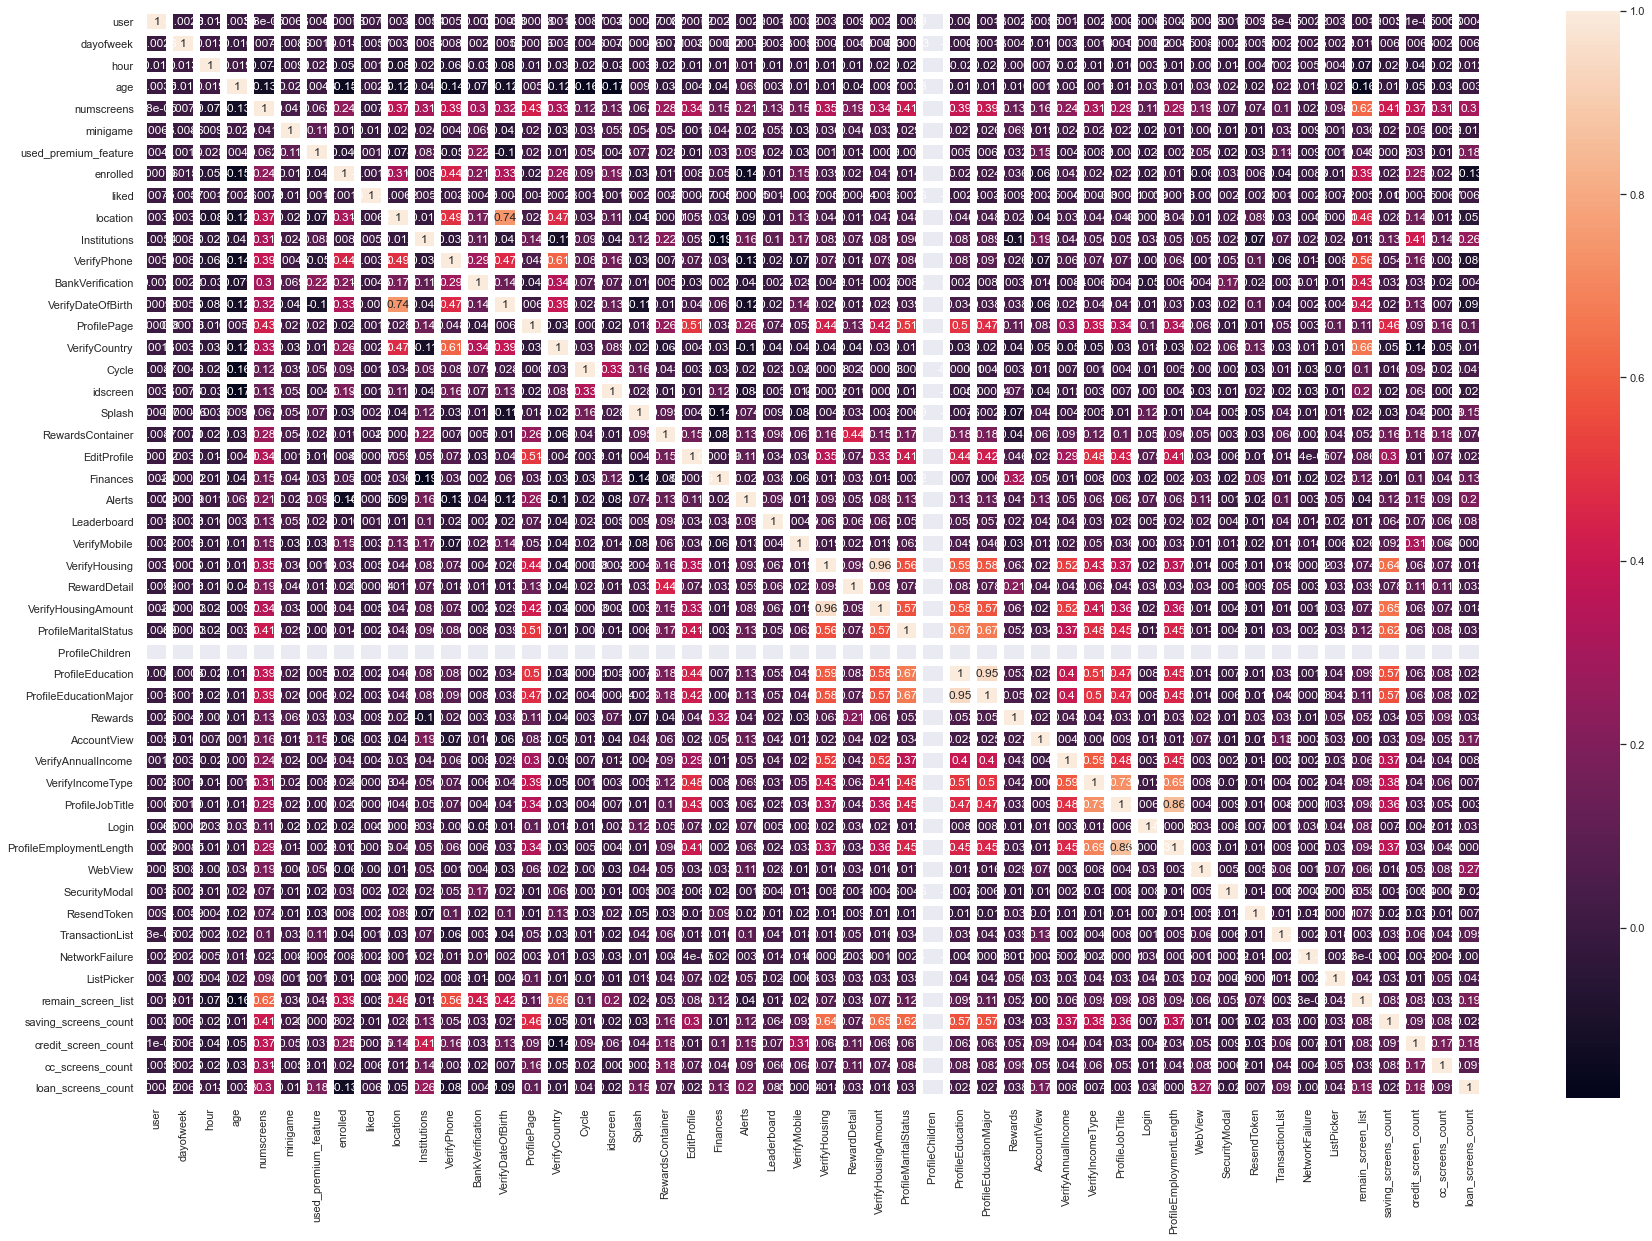

In [66]:
plt.figure(figsize= (30,20))
sns.heatmap(df.corr(), annot = True, linewidth = 6)

In [67]:
#Data preprocessing
#Split dataset in Train and Test

In [68]:
clean_df = df
target = df['enrolled']
df.drop(columns = 'enrolled', inplace = True)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 0)

In [70]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [71]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [72]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


In [73]:
#feature scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [75]:
'''Machine Learning Model Building
The target variable is categorical type 0 and 1, so we have to use supervised classification algorithms.

To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms 
then we can find the best ML model. '''

'Machine Learning Model Building\nThe target variable is categorical type 0 and 1, so we have to use supervised classification algorithms.\n\nTo build the best model, we have to train and test the dataset with multiple Machine Learning algorithms \nthen we can find the best ML model. '

In [76]:
#trying out every algorithm

In [77]:
# import required packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.6936

In [79]:
dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt = dt_model.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt)

0.5285

In [80]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
 
accuracy_score(y_test, y_pred_nb)

0.7114

In [81]:
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_nb_sc)

0.7114

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.7621

In [83]:
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

0.7616

In [84]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_score(y_test, y_pred_lr)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7685

In [85]:
lr_model2 = LogisticRegression(random_state = 0)
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_lr_sc)

0.768

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
 
accuracy_score(y_test, y_pred_knn)

0.6978

In [87]:
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_knn_sc)

0.7315

In [88]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
 
accuracy_score(y_test, y_pred_svc)

0.7609

In [89]:
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_svc_sc)

0.7789

In [ ]:
#We observe that Support Vector Classifier give best accuracy than ohter ML algorithm

Text(0.5, 1.0, 'Confussion Matrix')

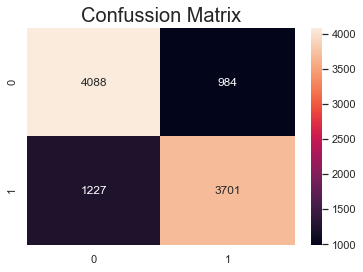

In [94]:
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_svc_sc )
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20) 

In [ ]:
#The model is giving type II error higher than type 

In [95]:
cr_xgb_pt2 = classification_report(y_test, y_pred_svc_sc)
 
print("Classification report >>> \n", cr_xgb_pt2)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      5072
           1       0.79      0.75      0.77      4928

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [ ]:
#Cross-validation of the ML model

In [ ]:
#To find the ML model is overfitted, under fitted or generalize doing cross-validation.

In [97]:
#Mapping predicted output to the target

In [98]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_svc_sc 
 
print(final_result)

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 1
...       ...       ...               ...
25091  143036         1                 1
27853   91158         1                 1
47278  248318         0                 0
37020  142418         1                 1
2217   279355         1                 1

[10000 rows x 3 columns]


In [ ]:
'''Save the Machine Learning model
After completion of the Machine Learning project or building the ML model need to deploy in an application. 
To deploy the ML model need to save it first. To save the Machine Learning project we can use the pickle or joblib package.

Here, we will see both ways, Use anyone which is better for you. '''